# Import Data

In [11]:
import pandas as pd

# Load the Crimes Trained data
data = pd.read_csv('Crimes Trained.csv')

# Apply Pre-Processing Steps

In [12]:
from sklearn.preprocessing import LabelEncoder

# Select the columns to encode
columns_to_encode = ['Category', 'Descript', 'DayOfWeek', 'PdDistrict', 'Resolution']

# Apply LabelEncoder to each column
label_encoder = LabelEncoder()
for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

In [22]:
data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,13-May-15,37,866,6,4,0,OAK ST / LAGUNA ST,-122.425892,37.774599
1,13-May-15,21,810,6,4,0,OAK ST / LAGUNA ST,-122.425892,37.774599
2,13-May-15,21,810,6,4,0,VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,13-May-15,16,404,6,4,11,1500 Block of LOMBARD ST,-122.426995,37.800873
4,13-May-15,16,404,6,5,11,100 Block of BRODERICK ST,-122.438738,37.771541


# Apply EDA Steps

In [13]:
# Explore the trained_data
trained_data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,13-May-15,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,13-May-15,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,13-May-15,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,13-May-15,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,13-May-15,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [14]:
# Check the summary statistics of trained_data
trained_data.describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784368
max,-120.500000,90.000000


In [15]:
# Check the data types of trained_data
trained_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [16]:
# Check for missing values in trained_data
trained_data.isnull().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

<Axes: >

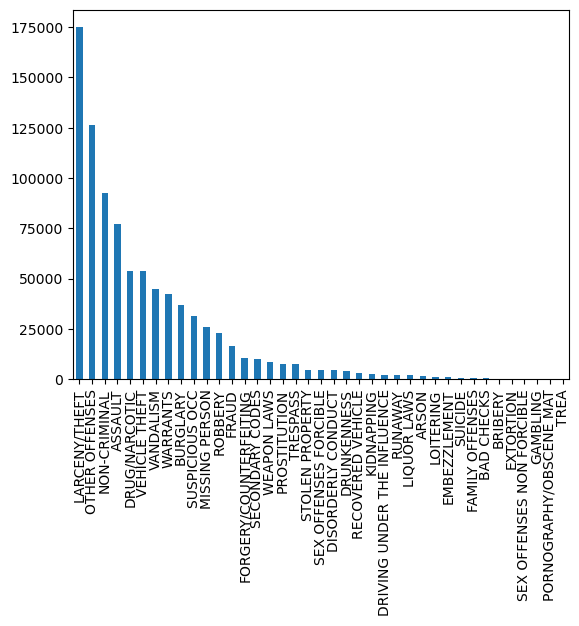

In [17]:
# Check the distribution of the target variable in trained_data
trained_data['Category'].value_counts().plot(kind='bar')

In [18]:
# Check the correlation between numerical features in trained_data
trained_data.corr()


C:\Users\Ali Raza\AppData\Local\Temp\ipykernel_2368\4062116407.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  trained_data.corr()


,X,Y
X,1.000000,0.559338
Y,0.559338,1.000000


# Import Libararies

In [4]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

In [20]:
data.columns

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y'],
      dtype='object')

In [23]:
x = data.iloc[:,[1,2,3,4,7,8]]

In [25]:
y = data.iloc[:,5]

In [26]:
y

0          0
1          0
2          0
3         11
4         11
          ..
878044    11
878045    11
878046    11
878047    11
878048    11
Name: Resolution, Length: 878049, dtype: int32

In [27]:
# Split the trained_data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(x, y, random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegression  
classifier = LogisticRegression(random_state=0)  
classifier.fit(X_train, y_train)  

C:\Users\Ali Raza\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [41]:
y_pred= classifier.predict([[37,866,6,4,-122.425892,37.774599]])  

C:\Users\Ali Raza\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [40]:
y_pred

array([11])

In [33]:
tst = pd.read_csv('Crimes Test.csv')

In [34]:
tst

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,10-05-15 23:59,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,10-05-15 23:51,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,10-05-15 23:50,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,10-05-15 23:45,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,10-05-15 23:45,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
...,...,...,...,...,...,...,...
884257,884257,01-01-03 00:01,Wednesday,MISSION,2600 Block of BRYANT ST,-122.408983,37.751987
884258,884258,01-01-03 00:01,Wednesday,NORTHERN,1900 Block of WASHINGTON ST,-122.425342,37.792681
884259,884259,01-01-03 00:01,Wednesday,INGLESIDE,5500 Block of MISSION ST,-122.445418,37.712075
884260,884260,01-01-03 00:01,Wednesday,BAYVIEW,1500 Block of HUDSON AV,-122.387394,37.739479
